# Notes to not loose my mind
So far biggest problem is that 2 ppl I watched have two different conventions: MSB vs LSB
links to those videos: [general](https://www.youtube.com/watch?v=F_Riqjdh2oM), [specific](https://www.youtube.com/watch?v=7MdEHsRZxvo)

In this sim I try to use MSB (from general video) which means that result "01" means
 - bit no. 0 has value 1
 - bit no. 1 has value 0

Or in other words, in MSB indexes of bit results are: 76543210

Thus, from now on to unify what is input what is output. In my cicruit:
- input $\rightarrow q_1$, MSB
- output $\rightarrow q_0$, LSB

This, again stems from following the general video and is in contrast to specific one where
- input $\rightarrow q_0$, MSB
- output $\rightarrow q_1$, LSB

## Description of deutsch's algorithm from specific vid
### Setup
To input lane: apply hadamar gate

To output lane: apply not + hadamar gate

### BBs
#### Constant 0
To output lane: apply identity gate (do noting)
#### Constant 1
To output lane: apply not gate
#### Balanced id
Add cnot gate with control = input and target = output
#### Balaneced not
Add cnot gate with control = input and target = output, and apply not gate to output lane

### Exit
To both lanes:
- apply haddamar
- measure state

## What we expect
We want to see:
- 0 state for constant BB (at the end of input lane)
- 1 state for balanced BB (at the end of input lane)

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

## Setup

C:\Users\Chris\AppData\Roaming\Python\Python39\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


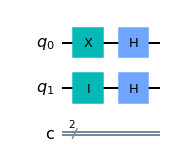

In [2]:
qc1=QuantumCircuit(2,2)
qc1.x(0)
qc1.id(1)
qc1.h(0)
qc1.h(1)
qc1.draw('mpl')

## Exit

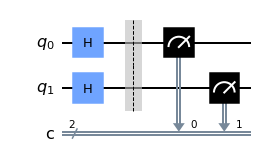

In [3]:
qc3=QuantumCircuit(2,2)
qc3.h(0)
qc3.h(1)
qc3.barrier()
qc3.measure(0,0)
qc3.measure(1,1)
qc3.draw('mpl')

## Black Boxes

In [4]:
def create_black_box(function_type: str):
    qc = QuantumCircuit(2,2)
    qc.barrier(range(2))    
    if function_type == "constant 1":
        qc.x(0)
        qc.barrier()
    elif function_type == "constant 0":
        qc.id(0)
        qc.barrier()
    elif function_type == "balanced not":
        qc.cx(1,0)
        qc.x(0)
        qc.barrier()
    elif function_type == "balanced id":
        qc.cx(1,0)
        qc.id(0)
        qc.barrier()
    else:
        raise Exception("Improper type of function! Function can either be 'constant 1|0' or 'balanced not|id'")
    return qc

### Example

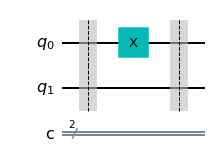

In [5]:
create_black_box("constant 1").draw('mpl')

## Composed gates

### Constant 1

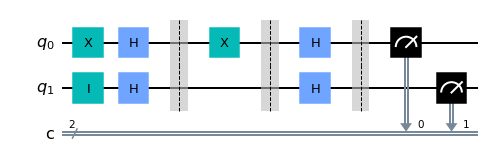

In [6]:
qc_constant_1 = qc1.compose(create_black_box('constant 1')).compose(qc3)
qc_constant_1.draw('mpl')

### Constant 0

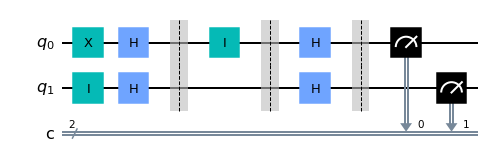

In [7]:
qc_constant_0 = qc1.compose(create_black_box('constant 0')).compose(qc3)
qc_constant_0.draw('mpl')

### Balanced not

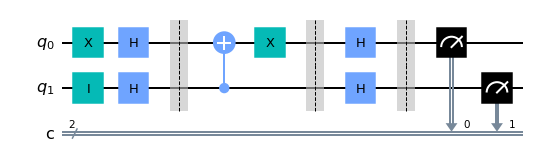

In [15]:
qc_balanced_not = qc1.compose(create_black_box('balanced not')).compose(qc3)
qc_balanced_not.draw('mpl')

### Balanced id

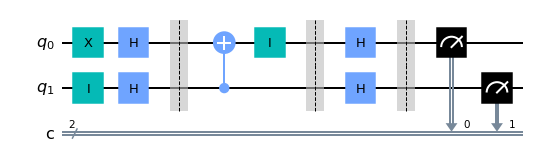

In [9]:
qc_balanced_id = qc1.compose(create_black_box('balanced id')).compose(qc3)
qc_balanced_id.draw('mpl')

## Results

In [10]:
backend=AerSimulator()

def get_result_counts(quantum_circuit):
    qc_compiled = transpile(quantum_circuit, backend)
    job_sim = backend.run(qc_compiled, shots=1024)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    return counts

In [11]:
get_result_counts(qc_balanced_id)

{'11': 1024}

In [12]:
get_result_counts(qc_balanced_not)

{'11': 1024}

In [13]:
get_result_counts(qc_constant_1)

{'01': 1024}

In [14]:
get_result_counts(qc_constant_0)

{'01': 1024}